# AUTO_REGRESSION

# Fetch Data

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
A = pd.read_csv("C:/Users/Anuj.kumar/Desktop/ts (2).csv", header=None)

In [2]:
A.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
A.columns = ["Month","Passengers"]

In [4]:
A.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
A.Month = pd.to_datetime(A.Month)

In [6]:
A.index = A.Month

In [7]:
A.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [8]:
A = A.drop("Month", axis = 1)

<AxesSubplot:xlabel='Month'>

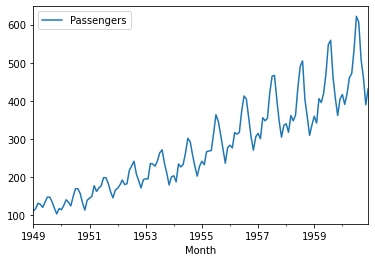

In [9]:
A.plot()

# Decomposition plot

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
B = seasonal_decompose(A, model="multiplicative")

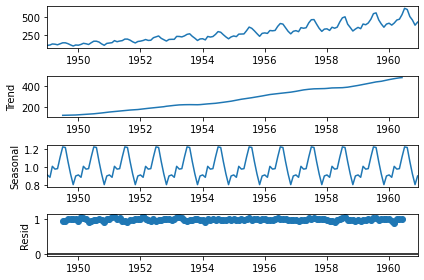

In [11]:
import matplotlib.pyplot as plt
B.plot()
plt.show()

# Test Of stationary

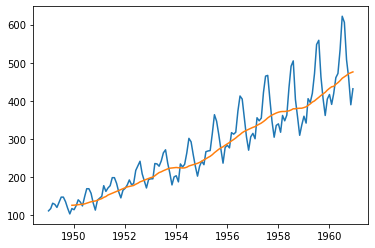

In [16]:
plt.plot(A)
plt.plot(A.rolling(window=12).mean())

# Convert TS into stationary

In [26]:
import numpy as np
B=np.log(A)-np.log(A.rolling(window=12).mean())

In [27]:
B.shape

(144, 1)

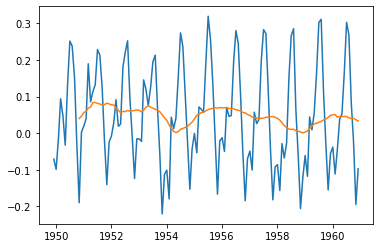

In [28]:
plt.plot(B)
plt.plot(B.rolling(window=12).mean())

# Divide data into training and testing set

In [29]:
C= B[B.Passengers.isnull() == False]

In [31]:
C.shape

(133, 1)

In [30]:
tr_n_rows = round(C.shape[0]*0.8)
tr_n_rows

106

In [34]:
training_set = C[0:106]
testing_set = C[106:133]

In [35]:
testing_set.head(1)

,Passengers
Month,
1958-10-01,-0.058164


In [36]:
testing_set.tail(1)

,Passengers
Month,
1960-12-01,-0.097342


# Create a Predictive Model

In [37]:
from statsmodels.tsa.ar_model import AR
model = AR(training_set).fit()

C:\Arjun\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [38]:
pred = model.predict(start="1958-07-01",end="1960-12-01")

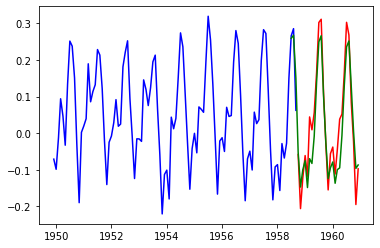

In [39]:
plt.plot(training_set, c = "blue")
plt.plot(testing_set, c = "red")
plt.plot(pred, c = "green")

In [40]:
Q=pd.DataFrame(pred, columns=['Passengers'])
Q

,Passengers
1958-07-01,0.259204
1958-08-01,0.267800
1958-09-01,0.150226
1958-10-01,-0.052060
1958-11-01,-0.147085
1958-12-01,-0.100122
1959-01-01,-0.075215
1959-02-01,-0.148487
1959-03-01,-0.069649
1959-04-01,-0.082619


In [41]:
import numpy as np

In [42]:
RM_LOG = np.log(A).rolling(window=12).mean()

In [43]:
from numpy import exp
pred_inverse=exp(Q+RM_LOG)

In [44]:
len(pred)

30

In [45]:
len(A)

144

In [47]:
pred = pred_inverse[114:]

In [48]:
pred

,Passengers
1958-07-01,482.427904
1958-08-01,489.775067
1958-09-01,435.446693
1958-10-01,356.708752
1958-11-01,324.813067
1958-12-01,340.515242
1959-01-01,350.769898
1959-02-01,327.969731
1959-03-01,358.281295
1959-04-01,357.493305
